In [76]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# change path of file accordingly
# df_march_13 = pd.read_json('../critical_201303_23.json', lines=True)

In [19]:
# Getting the number of unique IP addresses per country appearing in the dataset df...
def country_filter(df):
    for rows in range(len(df)):
        new_val = df.iloc[rows]['geo']
        if new_val:
            df.at[rows,'country'] = new_val['c']
        else:
            df.at[rows,'country'] = ''
    df_unique = df.drop_duplicates(subset='ip')
    per_country_counts = df_unique.country.value_counts()
    return (df_unique, per_country_counts)

In [9]:
# cleaning the banner of unwanted charecters...
def clean_banner(df):
    for rows in range(len(df)):
        df.at[rows,'banner'] = re.sub('(\\\\x(([a-z][a-z])|([0-9][0-9])|([0-9][a-z])|([a-z][0-9])))|\\r\\n', '', df.iloc[rows]['banner']).lstrip()
        
    return df

In [5]:
# Counting routers...
def count_routers(df):
    count_router = 0
    count_server = 0
    router = "router"
    for rows in range(len(df)):
        if router in df.iloc[rows]["banner"].lower():
            count_router+=1
        else:
            count_server+=1
    return (count_router, count_server)

In [57]:
#Searching banners for specific implementations given in the `keyword` list...
def banner_filter(df):
    keywords = ['cisco','d-link','freebsd','jetdirect','netgear','solaris','proftpd']
    potential_ips = {'CHN':[], 'USA':[], 'KOR':[]}
    sources = {'CHN':set(), 'USA':set(), 'KOR':set()}
    for rows in range(len(df)):
        country = df.iloc[rows]['country']
        if country in potential_ips.keys():
            banner_info = df.iloc[rows]['banner'].lower()
            for i in range(len(keywords)):
                keyword = keywords[i]
                if keyword in banner_info:
                    potential_ips[country].append(df.iloc[rows]['ip'])
                    sources[country].add(keyword)
                    i = len(keywords)
                
    return (potential_ips, sources)

In [58]:
def extract_banner_wise_data(filename):
    print("Extracting banner data for", filename)
    df = pd.read_json(filename, lines=True)
    print('Filtering countries...')
    (df, country_stats) = country_filter(df)
    print('Scanning banners...')
    (potential_ips, sources) = banner_filter(df)
    return (df, country_stats, potential_ips, sources)

In [77]:
# Feb 2013
(df_feb_13, country_stats_feb_13, potential_ips_feb_13, sources_feb_13) = extract_banner_wise_data('../critical_201302_23.json')

# Jan 2013
(df_jan_13, country_stats_jan_13, potential_ips_jan_13, sources_jan_13) = extract_banner_wise_data('../critical_201301_23.json')

#Mar 2013
(df_mar_13, country_stats_mar_13, potential_ips_mar_13, sources_mar_13) = extract_banner_wise_data('../critical_201303_23.json')

Extracting banner data for ../critical_201302_23.json
Filtering countries...
Scanning banners...
Extracting banner data for ../critical_201301_23.json
Filtering countries...
Scanning banners...
Extracting banner data for ../critical_201303_23.json
Filtering countries...
Scanning banners...


In [79]:
#May 2012
(df_may_12, country_stats_may_12, potential_ips_may_12, sources_may_12) = extract_banner_wise_data('../critical_201205_23.json')

#Jun 2012
(df_jun_12, country_stats_jun_12, potential_ips_jun_12, sources_jun_12) = extract_banner_wise_data('../critical_201206_23.json')

#Jul 2012
(df_jul_12, country_stats_jul_12, potential_ips_jul_12, sources_jul_12) = extract_banner_wise_data('../critical_201207_23.json')

#Aug 2012
(df_aug_12, country_stats_aug_12, potential_ips_aug_12, sources_aug_12) = extract_banner_wise_data('../critical_201208_23.json')

#Sep 2012
(df_sep_12, country_stats_sep_12, potential_ips_sep_12, sources_sep_12) = extract_banner_wise_data('../critical_201209_23.json')

#Oct 2012
(df_oct_12, country_stats_oct_12, potential_ips_oct_12, sources_oct_12) = extract_banner_wise_data('../critical_201210_23.json')

#Nov 2012
(df_nov_12, country_stats_nov_12, potential_ips_nov_12, sources_nov_12) = extract_banner_wise_data('../critical_201211_23.json')

#Dec 2012
(df_dec_12, country_stats_dec_12, potential_ips_dec_12, sources_dec_12) = extract_banner_wise_data('../critical_201212_23.json')


Extracting banner data for ../critical_201205_23.json
Filtering countries...
Scanning banners...
Extracting banner data for ../critical_201206_23.json
Filtering countries...
Scanning banners...
Extracting banner data for ../critical_201207_23.json
Filtering countries...
Scanning banners...
Extracting banner data for ../critical_201208_23.json
Filtering countries...
Scanning banners...
Extracting banner data for ../critical_201209_23.json
Filtering countries...
Scanning banners...
Extracting banner data for ../critical_201210_23.json
Filtering countries...
Scanning banners...
Extracting banner data for ../critical_201211_23.json
Filtering countries...
Scanning banners...
Extracting banner data for ../critical_201212_23.json
Filtering countries...
Scanning banners...


In [90]:
country_stats_mar_13

CHN    665802
USA    262478
KOR    236931
BRA     73561
IND     64916
        ...  
SPM         1
TKL         1
PRK         1
VAT         1
A1          1
Name: country, Length: 232, dtype: int64

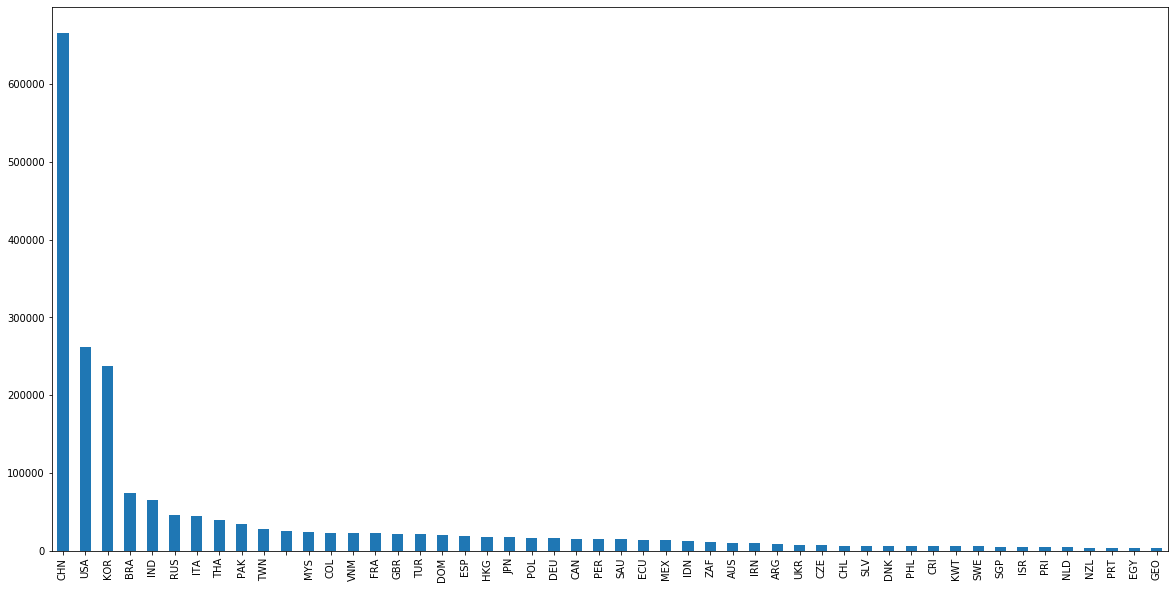

In [100]:
country_stats_mar_13[:50].plot.bar(figsize=(20,10))

Mar 2013: 
CHN: 997,
USA: 5285,
KOR: 663

Feb 2013: 
CHN: 972,
USA: 5226,
KOR: 552

Jan 2013: 
CHN: 1171,
USA: 6385,
KOR: 747



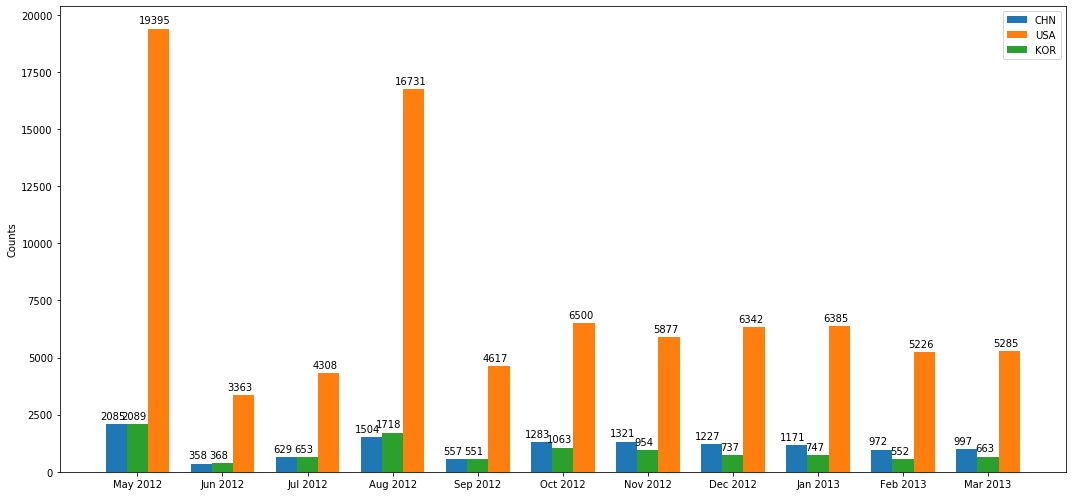

<Figure size 3600x3600 with 0 Axes>

In [103]:
print('Mar 2013: \nCHN: %d,\nUSA: %d,\nKOR: %d\n' 
      % (len(potential_ips_mar_13['CHN']), len(potential_ips_mar_13['USA']), len(potential_ips_mar_13['KOR'])))
print('Feb 2013: \nCHN: %d,\nUSA: %d,\nKOR: %d\n' 
      % (len(potential_ips_feb_13['CHN']), len(potential_ips_feb_13['USA']), len(potential_ips_feb_13['KOR'])))
print('Jan 2013: \nCHN: %d,\nUSA: %d,\nKOR: %d\n' 
      % (len(potential_ips_jan_13['CHN']), len(potential_ips_jan_13['USA']), len(potential_ips_jan_13['KOR'])))

labels = ['May 2012','Jun 2012','Jul 2012','Aug 2012','Sep 2012','Oct 2012',
          'Nov 2012','Dec 2012','Jan 2013', 'Feb 2013', 'Mar 2013']
chn_counts = [len(potential_ips_may_12['CHN']), len(potential_ips_jun_12['CHN']), len(potential_ips_jul_12['CHN']),
              len(potential_ips_aug_12['CHN']), len(potential_ips_sep_12['CHN']), len(potential_ips_oct_12['CHN']),
              len(potential_ips_nov_12['CHN']), len(potential_ips_dec_12['CHN']), len(potential_ips_jan_13['CHN']), 
              len(potential_ips_feb_13['CHN']), len(potential_ips_mar_13['CHN'])]

usa_counts = [len(potential_ips_may_12['USA']), len(potential_ips_jun_12['USA']), len(potential_ips_jul_12['USA']),
              len(potential_ips_aug_12['USA']), len(potential_ips_sep_12['USA']), len(potential_ips_oct_12['USA']),
              len(potential_ips_nov_12['USA']), len(potential_ips_dec_12['USA']), len(potential_ips_jan_13['USA']), 
              len(potential_ips_feb_13['USA']), len(potential_ips_mar_13['USA'])]

kor_counts = [len(potential_ips_may_12['KOR']), len(potential_ips_jun_12['KOR']), len(potential_ips_jul_12['KOR']),
              len(potential_ips_aug_12['KOR']), len(potential_ips_sep_12['KOR']), len(potential_ips_oct_12['KOR']),
              len(potential_ips_nov_12['KOR']), len(potential_ips_dec_12['KOR']), len(potential_ips_jan_13['KOR']), 
              len(potential_ips_feb_13['KOR']), len(potential_ips_mar_13['KOR'])]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width, chn_counts, width, label='CHN')
rects2 = ax.bar(x + width, usa_counts, width, label='USA')
rects3 = ax.bar(x, kor_counts, width, label = 'KOR')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
# ax.set_title('Counts by country from Jan to Mar 2013')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 3, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.figure(figsize=(50,50))

plt.show()